## Problem 2

In this problem, we will consider the Vasicek model for the short rate $r_t$ with dynamics given by

$$
dr_t = (b - ar_t)dt + \sigma dW_t, \quad t > 0
$$
$$
r_0 = r \tag{14}
$$

We know that the distribution of $r_T|r_t$ is given by

$$
r_T \sim \mathcal{N}\left(e^{-aT}r(0) + \frac{b}{a}\left(1 - e^{-aT}\right), \frac{\sigma^2}{2a}\left[1 - e^{-2aT}\right]\right) \tag{15}
$$

and that the stationary distribution is

$$
r_\infty \sim \mathcal{N}\left(\frac{b}{a}, \frac{\sigma^2}{2a}\right) \tag{16}
$$


### 2.a) Write a function in Python that takes $T, r_0, a, b$ and $σ$ and a confidence level $α$ as inputs and returns the lower-, upper- or two-sided confidence bounds of $r_T$.

Here we learn to quantify interest rate risk using the Vasicek. The function answers "With 95% probability, where will the rate be in 5 years?".

In [25]:
import numpy as np
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm


def vasicek_confidence_bounds(T, r0, a, b, sigma, alpha, bound_type='two-sided'):
    if bound_type == 'two-sided':
        type_ci = 'two_sided'
        size_ci = 1 - alpha
    elif bound_type == 'lower':
        type_ci = 'lower'
        size_ci = alpha
    elif bound_type == 'upper':
        type_ci = 'upper'
        size_ci = 1 - alpha
    
    lb, ub = fid.ci_vasicek(r0, a, b, sigma, T, size_ci, type_ci)
    
    T = np.atleast_1d(T)
    mean_rT = r0 * np.exp(-a * T) + (b / a) * (1 - np.exp(-a * T))
    
    return {'lower': lb, 'upper': ub, 'mean': mean_rT}

### 2.b) Plot the two-sided confidence bounds for α = 0.05 and appropriately many choices of T < 10 setting r0 = 0.04, a = 2, b = 0.1, σ = 0.02. Also include the two-sided confidence bounds under the stationary distribution in your plot.

**Purpose** is to visualize how the Vasicek model's confidence intervals evolve over time and converge to a stationary distribution. 

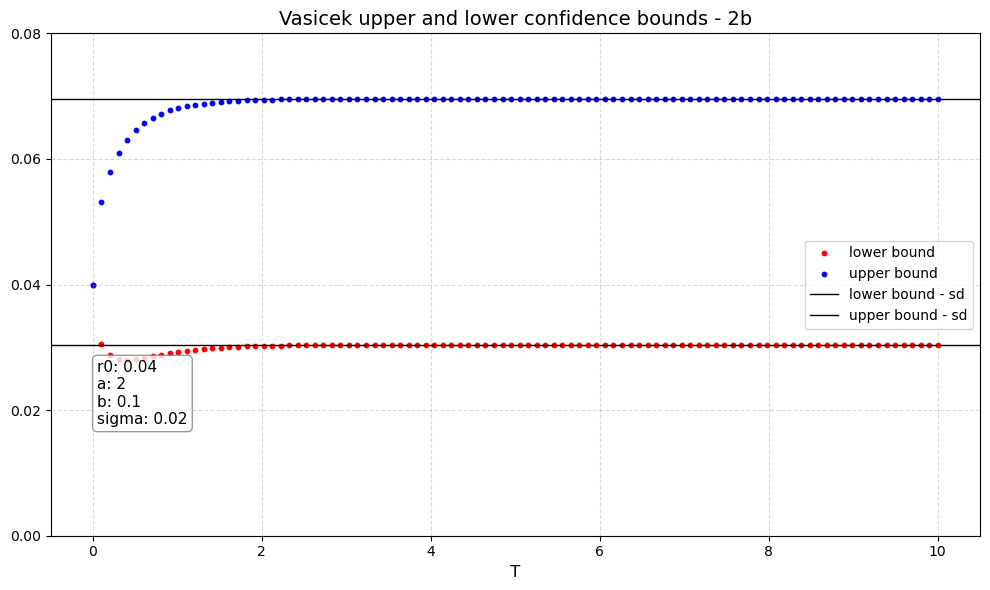

In [26]:
# Parameters
r0 = 0.04
a = 2
b = 0.1
sigma = 0.02
alpha = 0.05

# Time points
T = np.linspace(0, 10, 100)

# Compute confidence bounds
lb, ub = fid.ci_vasicek(r0, a, b, sigma, T, 1-alpha, 'two_sided')

# Compute stationary distribution bounds
lb_stat, ub_stat = fid.ci_vasicek(r0, a, b, sigma, np.inf, 1-alpha, 'two_sided')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bounds
ax.scatter(T, lb, s=10, color='red', marker='o', label='lower bound')
ax.scatter(T, ub, s=10, color='blue', marker='o', label='upper bound')
ax.axhline(y=lb_stat, color='black', linestyle='-', linewidth=1, label='lower bound - sd')
ax.axhline(y=ub_stat, color='black', linestyle='-', linewidth=1, label='upper bound - sd')

# Labels and title
ax.set_xlabel('T', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Vasicek upper and lower confidence bounds - 2b', fontsize=14)

# Y-axis ticks every 0.02
ax.set_yticks(np.arange(0, 0.10, 0.02))
ax.set_ylim([0, 0.08])

# Grid
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Legend
ax.legend(loc='right', fontsize=10)

# Text box with parameters
textstr = f'r0: {r0}\na: {a}\nb: {b}\nsigma: {sigma}'
props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
ax.text(0.05, 0.35, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

*Intuition: Plot shows that for the $r_0$ starting at 4% the confidence bands widen initially as uncertainty accumulates, and after 2 years it has stabilized completely. The convergence speed depends on $a$: high $a§ means fast convergence (within 2-3 years) while a low $a$ means slow convergence (10+ years)*

### 2.c) Plotting the confidence intervals for a range of choices of a.

Purpose: To analyze how quickly the short rate in the Vasicek model converges to its stationary distribution for different parameter values. By varying the mean-reversion speed $a$ and the volatility $\sigma$ while keeping the long-run mean fixed. 

- $a$ is the speed of mean reversion, determines how fast the influence of the initial short rate disappears.
- $\sigma$ is volality and affects the width of the confidence interval. 

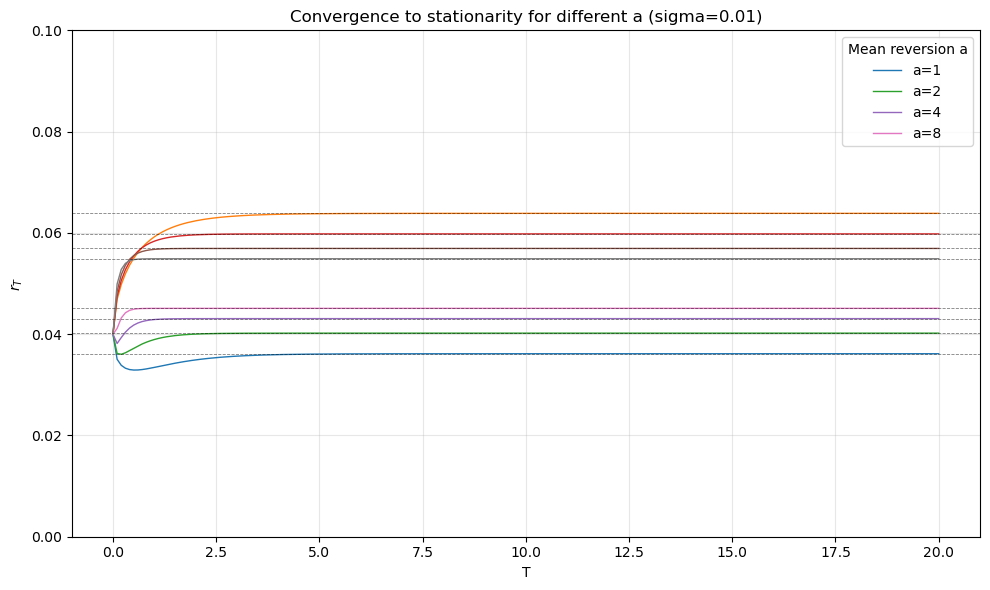

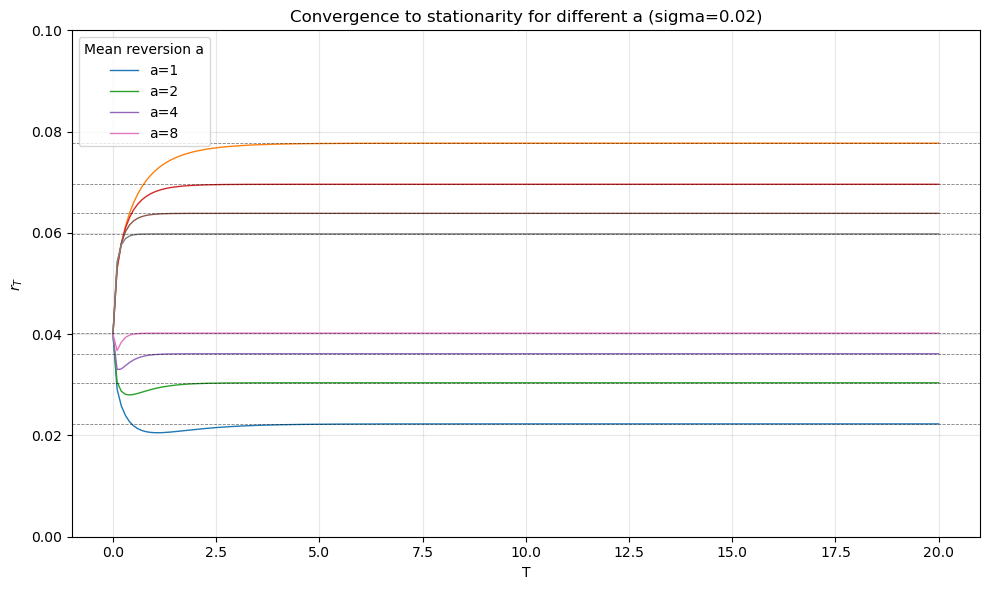

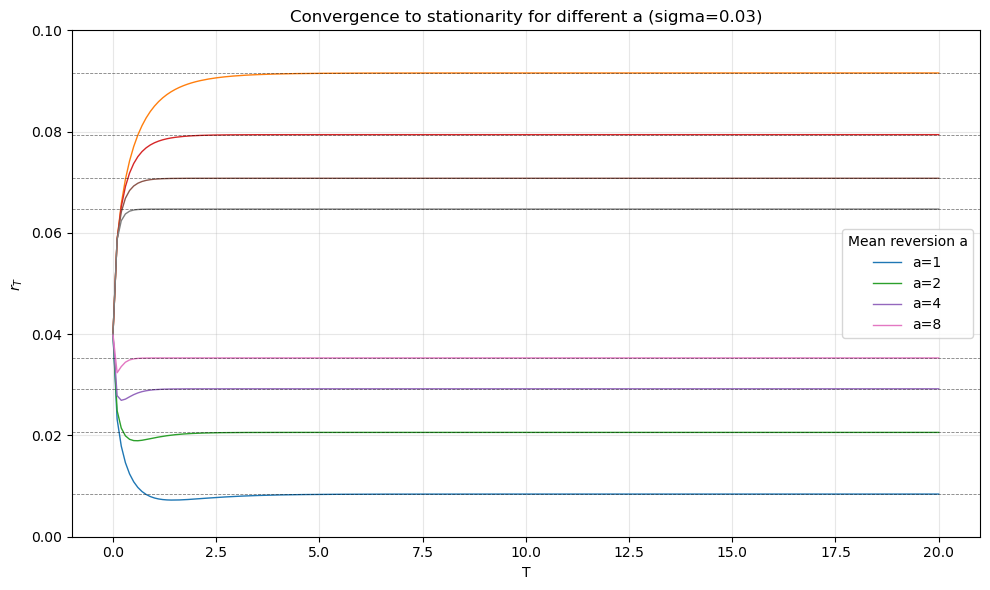

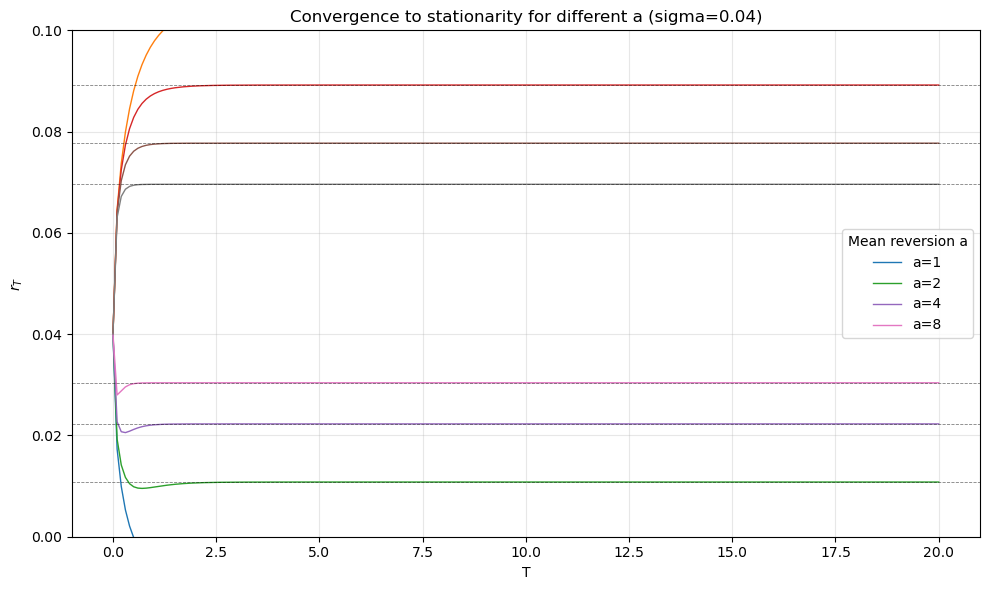

In [27]:
r0 = 0.04
a_values = [1, 2, 4, 8]
sigma_values = [0.01, 0.02, 0.03, 0.04]
alpha = 0.05
T_max = 20

T = np.linspace(0, T_max, 200)

for sigma in sigma_values:
    plt.figure(figsize=(10, 6))
    
    for a in a_values:
        b = a * 0.05  # keep b/a = 0.05
        lb, ub = fid.ci_vasicek(r0, a, b, sigma, T, 1-alpha, 'two_sided')
        plt.plot(T, lb, linewidth=1, label=f'a={a}')
        plt.plot(T, ub, linewidth=1)
    
    # Stationary bounds
    for a in a_values:
        b = a * 0.05
        lb_stat, ub_stat = fid.ci_vasicek(r0, a, b, sigma, np.inf, 1-alpha, 'two_sided')
        plt.axhline(y=lb_stat, color='black', linestyle='--', linewidth=0.6, alpha=0.5)
        plt.axhline(y=ub_stat, color='black', linestyle='--', linewidth=0.6, alpha=0.5)

    plt.xlabel('T')
    plt.ylabel(r'$r_T$')
    plt.title(f'Convergence to stationarity for different a (sigma={sigma})')
    plt.legend(title='Mean reversion a')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 0.10])
    plt.tight_layout()
    plt.show()


Interpretation: The plots show that the short rate converges to its stationary distribution significantly faster for larger values of the mean-reversion parameter a. Increasing $\sigma$ simple widens the confidence bands.

---

### Problem 2.d) Derive the difference equation for the short rate for the Euler, Milstein and an exact scheme.

Since the diffusion coefficient in the Vasicek model is independent of the short rate $r_t$, the Euler and Milstein schemes coincide. The exact discretization can be derived using the conditional distribution of $r_{t+\delta} \mid r_t$. The resulting difference equations are given by

**Euler scheme**
$$
r_{m+1} = r_m + (b - a r_m)\,\delta + \sigma \sqrt{\delta}\, Z_{m+1}
$$

**Milstein scheme**
$$
r_{m+1} = r_m + (b - a r_m)\,\delta + \sigma \sqrt{\delta}\, Z_{m+1}
$$

**Exact scheme**
$$
r_{m+1} = r_m e^{-a\delta} + \frac{b}{a}\left(1 - e^{-a\delta}\right)
+ \sqrt{\frac{\sigma^2}{2a}\left(1 - e^{-2a\delta}\right)}\, Z_{m+1}
$$

where $Z_{m+1} \sim \mathcal{N}(0,1)$. The exact scheme is expected to be the most accurate since it is based on the closed-form solution of the SDE, although the difference between the schemes becomes small for sufficiently large \( M \).


*Interpretation: The Euler and Milstein schemes produce identical simulations because the volatility term in the Vasicek model does not depend on the level of the short rate. The exact scheme is more accurate since it samples directly from the true conditional distribution of the short rate, but when the time step is sufficiently small, all three schemes generate very similar results.*

### 2.e) Write a python function that take as inputs T, M, r0, a, b, σ, and ”scheme”, and returns a simulated trajectory of the short rate. Plot

We simulate a single trajectory of the short rate in the Vasicek model using the Euler, Milstein and exact schemes. The parameters are set to $r_0 = 0.04, a = 2, b = 0.1, \sigma = 0.02 $, with terminal time $T = 10$ and $M = 10{,}000$ time steps. The lower and upper confidence bounds are also included for a two-sided confidence level of $\alpha = 0.1$.


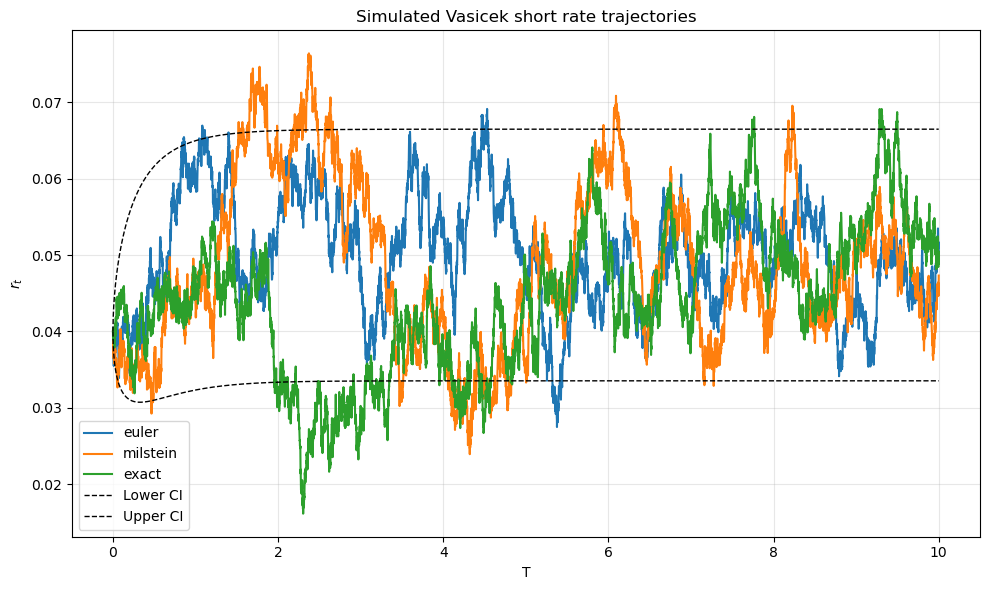

In [28]:
def simulate_vasicek(T, M, r0, a, b, sigma, scheme="euler", seed=None):
    if seed is not None:
        np.random.seed(seed)

    dt = T / M
    r = np.zeros(M + 1)
    r[0] = r0
    Z = np.random.normal(0, 1, M)

    for m in range(M):
        if scheme in ["euler", "milstein"]:
            r[m+1] = r[m] + (b - a * r[m]) * dt + sigma * np.sqrt(dt) * Z[m]

        elif scheme == "exact":
            r[m+1] = (
                r[m] * np.exp(-a * dt)
                + (b / a) * (1 - np.exp(-a * dt))
                + np.sqrt((sigma**2 / (2 * a)) * (1 - np.exp(-2 * a * dt))) * Z[m]
            )

        else:
            raise ValueError("Unknown scheme")

    return r


# Parameters
T = 10
M = 10_000
r0, a, b, sigma = 0.04, 2, 0.1, 0.02
alpha = 0.1

time_grid = np.linspace(0, T, M + 1)

# Plot
plt.figure(figsize=(10, 6))

for scheme in ["euler", "milstein", "exact"]:
    r_path = simulate_vasicek(T, M, r0, a, b, sigma, scheme)
    plt.plot(time_grid, r_path, label=scheme)

# Confidence bounds from fid
lb, ub = fid.ci_vasicek(r0, a, b, sigma, time_grid, 1 - alpha, "two_sided")
plt.plot(time_grid, lb, "k--", linewidth=1, label="Lower CI")
plt.plot(time_grid, ub, "k--", linewidth=1, label="Upper CI")

plt.xlabel("T")
plt.ylabel(r"$r_t$")
plt.title("Simulated Vasicek short rate trajectories")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

*Interpretation: even though the three schemes does not like the same as the solution, they all three generate similar trajectories when driven by the same Brownian motion.*

### 2.f Empirical vs theoretical distribution of $r_T$
We set $T = 3$ and simulate the Vasicek short rate $N$ times using the exact scheme. Let $r_3^{(n)}$ denote the value of the short rate at time $T = 3$ in the $n$'th simulation. The simulated values are sorted into equally spaced bins in order to construct an empirical probability mass function, which is then compared to the theoretical distribution of $r_T$.


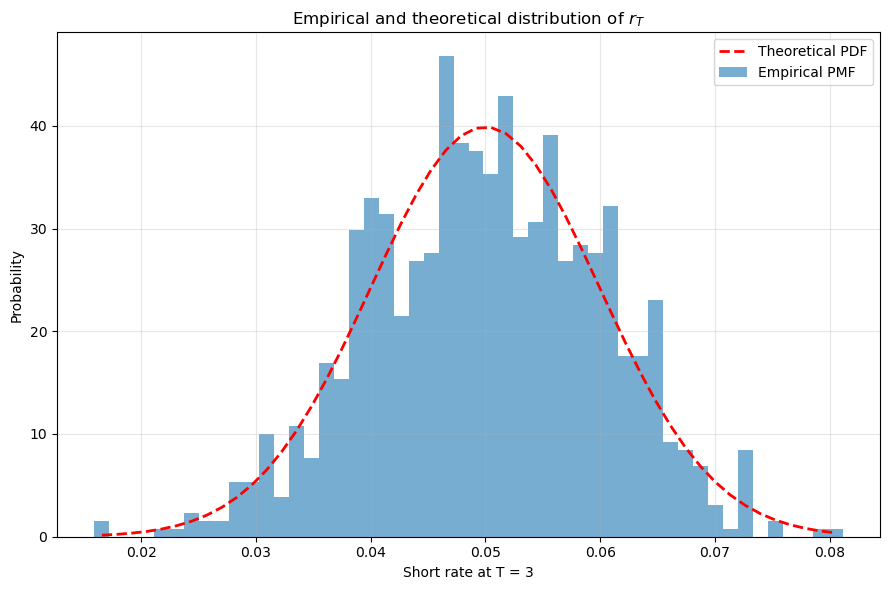

In [29]:
# Parameters
T = 3
M = 1000
N = 1000
r0 = 0.04
a = 2
b = 0.1
sigma = 0.02

dt = T / M

# Exact Vasicek step
def vasicek_exact_step(r, a, b, sigma, dt, Z):
    return (
        r * np.exp(-a * dt)
        + (b / a) * (1 - np.exp(-a * dt))
        + np.sqrt((sigma**2 / (2 * a)) * (1 - np.exp(-2 * a * dt))) * Z
    )

# Simulate r_T values
rT = np.zeros(N)

for n in range(N):
    r = r0
    Z = np.random.normal(0, 1, M)
    for m in range(M):
        r = vasicek_exact_step(r, a, b, sigma, dt, Z[m])
    rT[n] = r

# Empirical PMF
num_bins = 50
hist, bin_edges = np.histogram(rT, bins=num_bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Theoretical distribution
mean = np.exp(-a*T)*r0 + (b/a)*(1 - np.exp(-a*T))
var  = (sigma**2/(2*a))*(1 - np.exp(-2*a*T))
std  = np.sqrt(var)

theoretical_pdf = norm.pdf(bin_centers, mean, std)

# Plot
plt.figure(figsize=(9, 6))
plt.bar(bin_centers, hist, width=bin_edges[1]-bin_edges[0], alpha=0.6, label="Empirical PMF")
plt.plot(bin_centers, theoretical_pdf, 'r--', linewidth=2, label="Theoretical PDF")
plt.xlabel("Short rate at T = 3")
plt.ylabel("Probability")
plt.title("Empirical and theoretical distribution of $r_T$")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation**

The empirical PMF closely matches the theoretical PMF of $r_T$, confirming that the exact simulation scheme reproduces comewhat the correct finite-time distribution of the Vasicek model. Small discrepancies are due to sampling error and decrease as the number of simulations $N$ increases.

---

### 2.g) Compare accuracy for different M and N
We now study how the difference between the empirical and theoretical distributions depends on the number of time steps $M$ and the number of simulations $N$. For each combination of $M$ and $N$, we compute the total squared difference between the empirical frequencies and the theoretical probabilities across a fixed number of bins.


Empirical mean: 0.049836 | Theoretical mean: 0.049975
Empirical std:  0.009844 | Theoretical std:  0.010000


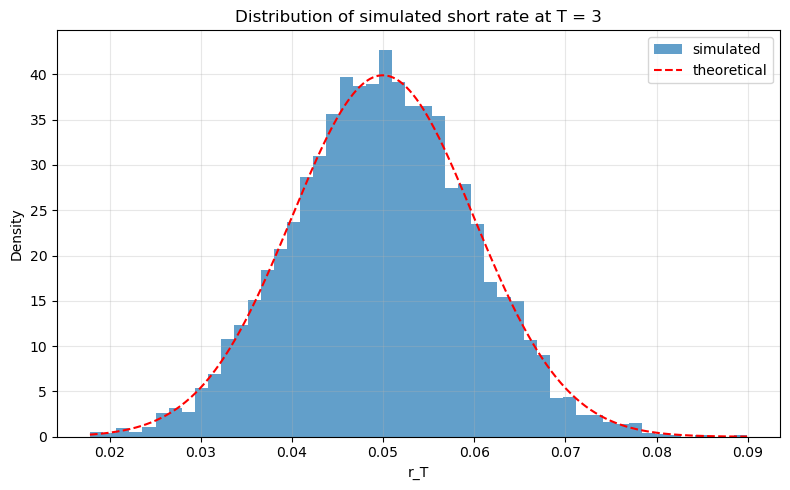

In [34]:
# --- Parameters (reduced but sufficient) ---
r0, a, b, sigma = 0.04, 2, 0.1, 0.02
T, M, N = 3, 5000, 5000
dt = T / M

# --- Vectorized exact Vasicek simulation ---
np.random.seed(42)
Z = np.random.randn(N, M)

r = np.zeros((N, M+1))
r[:, 0] = r0

exp_term = np.exp(-a * dt)
mean_adj = (b/a) * (1 - exp_term)
std_adj = np.sqrt((sigma**2 / (2*a)) * (1 - np.exp(-2*a*dt)))

for m in range(M):
    r[:, m+1] = r[:, m]*exp_term + mean_adj + std_adj * Z[:, m]

r_T = r[:, -1]

# --- Theoretical distribution ---
mean_theo = np.exp(-a*T)*r0 + (b/a)*(1 - np.exp(-a*T))
std_theo  = np.sqrt((sigma**2 / (2*a)) * (1 - np.exp(-2*a*T)))

# --- Check moments ---
print(f"Empirical mean: {np.mean(r_T):.6f} | Theoretical mean: {mean_theo:.6f}")
print(f"Empirical std:  {np.std(r_T):.6f} | Theoretical std:  {std_theo:.6f}")

# --- Plot ---
plt.figure(figsize=(8,5))
plt.hist(r_T, bins=50, density=True, alpha=0.7, label="simulated")

x = np.linspace(min(r_T), max(r_T), 400)
plt.plot(x, norm.pdf(x, mean_theo, std_theo), "r--", label="theoretical")

plt.xlabel("r_T")
plt.ylabel("Density")
plt.title("Distribution of simulated short rate at T = 3")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


*Interpretation: The empirical distribution of the simulated short rate converges to the theoretical distribution as the number of simulations increases. The simulated mean and standard deviation are very close to their theoretical values, showing that the exact Vasicek scheme reproduces the correct finite-time distribution. The total squared error decreases mainly when the number of simulations $N$ is increased, while increasing the number of time steps $M$ has a much smaller effect. This shows that Monte Carlo error dominates discretization error once $M$ is sufficiently large.*